In [2]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import os

# Benchmarking the System Performance

In [3]:
run_id = 'Algorithm1_apple_etc'

In [4]:
os.mkdir(run_id)

In [5]:
dir_ = './' + run_id + '/'

This Jupyter notebook serves to benchmark the performance of the prototype system.

### Loading and importing the system

In [137]:
%run ../tools/dataloader.py
%run ../system/activate.py

### Loading and importing financial data to forecast and to benchmark the system on

In [125]:
predict = DataLoader('BP', '2018-02-01', '2018-05-01')
predict = predict.get_adjclose()

In [126]:
predict_req, real = data_prep(predict, 20, 30) # dividing data into predictor input and real data

### Individual predictor forecasts

In [138]:
individual_predictors_forecasts = individual_predictors_pretrained_BP_30_3(predict_req, 30)

### System disagreement between individual predictor forecasts

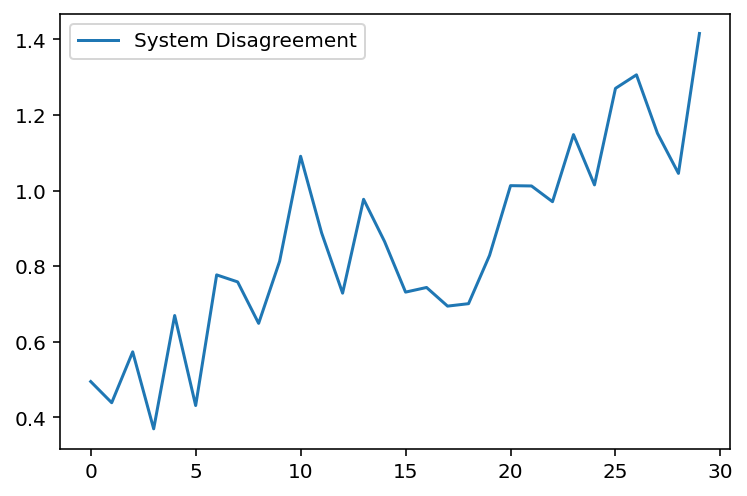

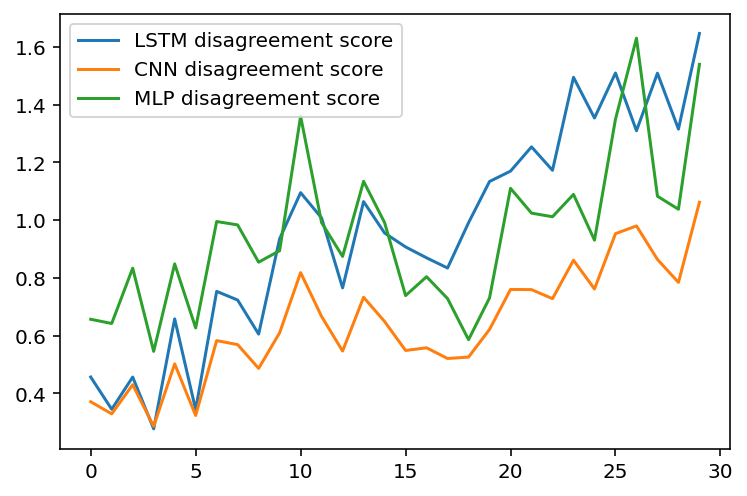

In [139]:
system_disagreement(individual_predictors_forecasts)

### Building consensus forecast values

In [140]:
consensus_forecasts = consensus(individual_predictors_forecasts, real)

In [141]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [142]:
summary = all_stats_frame(all_forecasts, individual_predictors_forecasts) # combining individual predictor forecasts, consensus forecasts and disagreement scores
summary

,Average,NoMemory,Memory,Focus,Anchor,Real Value,LSTM,CNN,MLP,System Disagreement,LSTM disagreement score,CNN disagreement score,MLP disagreement score
Date,,,,,,,,,,,,,
2018-03-02,32.080044,32.080044,32.080044,32.080044,32.676619,31.549549,31.623466,31.880047,32.736618,0.494734,0.456577,0.371051,0.656574
2018-03-05,32.074802,31.874226,31.974514,31.729818,31.921899,31.924553,31.729818,31.777794,32.716793,0.438655,0.344983,0.328992,0.641991
2018-03-06,31.974421,31.746817,31.811523,31.597425,32.046524,32.242489,31.517956,31.597425,32.807880,0.573300,0.456465,0.429975,0.833460
2018-03-07,32.043608,32.060166,31.968368,32.589111,31.961701,32.046844,31.784128,31.757584,32.589111,0.369568,0.277176,0.286024,0.545504
2018-03-08,31.782700,31.676645,31.665902,31.124746,31.992100,32.169121,31.124746,31.592314,32.631039,0.669463,0.657953,0.502097,0.848339
2018-03-09,31.923702,31.979539,31.862320,32.550377,31.873169,32.332169,31.580156,31.640572,32.550377,0.431209,0.343545,0.323407,0.626675
2018-03-12,31.594761,31.750185,31.535235,32.589863,31.945357,32.487061,30.841606,31.352814,32.589863,0.777003,0.753155,0.582752,0.995102
2018-03-13,31.675435,31.915495,31.653765,32.658768,31.905215,32.242489,30.952255,31.415283,32.658768,0.758450,0.723180,0.568837,0.983332
2018-03-14,31.607501,31.732082,31.604182,32.461731,31.687389,31.688131,31.002180,31.358593,32.461731,0.648689,0.605321,0.486517,0.854230


In [14]:
summary.to_csv(dir_ + run_id + '_Forecast_Summary.csv')

### Absolute error analysis of individual predictors and consensus forecasts

In [143]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real)
prediction_error

,LSTM absolute error,CNN absolute error,MLP absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,System Disagreement
Date,,,,,,,,,,,,
2018-03-02,0.073917,0.330498,1.187069,0.530495,0.530495,0.530495,0.530495,1.127070,0.456577,0.371051,0.656574,0.494734
2018-03-05,0.194735,0.146759,0.792240,0.150249,0.050327,0.049961,0.194735,0.002654,0.344983,0.328992,0.641991,0.438655
2018-03-06,0.724533,0.645063,0.565392,0.268068,0.495672,0.430966,0.645063,0.195965,0.456465,0.429975,0.833460,0.573300
2018-03-07,0.262716,0.289261,0.542267,0.003237,0.013322,0.078476,0.542267,0.085143,0.277176,0.286024,0.545504,0.369568
2018-03-08,1.044374,0.576807,0.461918,0.386421,0.492476,0.503219,1.044374,0.177021,0.657953,0.502097,0.848339,0.669463
2018-03-09,0.752012,0.691597,0.218208,0.408467,0.352630,0.469848,0.218208,0.458999,0.343545,0.323407,0.626675,0.431209
2018-03-12,1.645454,1.134247,0.102802,0.892300,0.736876,0.951825,0.102802,0.541704,0.753155,0.582752,0.995102,0.777003
2018-03-13,1.290234,0.827206,0.416279,0.567053,0.326993,0.588724,0.416279,0.337274,0.723180,0.568837,0.983332,0.758450
2018-03-14,0.685951,0.329538,0.773600,0.080630,0.043951,0.083949,0.773600,0.000743,0.605321,0.486517,0.854230,0.648689


In [16]:
prediction_error.to_csv(dir_ + run_id + '_Prediction_Errors.csv')

### Correlation matrix of individual predictor and consensus forecast absolute errors

,LSTM absolute error,CNN absolute error,MLP absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,System Disagreement
LSTM absolute error,1.000000,0.979551,0.896150,0.988506,0.982738,0.986942,0.919477,0.957648,0.917558,0.861703,0.639271,0.861203
CNN absolute error,0.979551,1.000000,0.915344,0.990143,0.989535,0.992093,0.929611,0.965080,0.840269,0.821061,0.656519,0.820303
MLP absolute error,0.896150,0.915344,1.000000,0.931507,0.941516,0.932660,0.980488,0.937476,0.745415,0.683940,0.481631,0.683061
Average absolute error,0.988506,0.990143,0.931507,1.000000,0.997834,0.999370,0.937401,0.984450,0.863072,0.805426,0.589605,0.804892
NoMemory absolute error,0.982738,0.989535,0.941516,0.997834,1.000000,0.998702,0.948800,0.983117,0.846989,0.790642,0.578948,0.790059
Memory absolute error,0.986942,0.992093,0.932660,0.999370,0.998702,1.000000,0.941492,0.984224,0.855562,0.801033,0.590233,0.800458
Focus absolute error,0.919477,0.929611,0.980488,0.937401,0.948800,0.941492,1.000000,0.931932,0.777144,0.719693,0.516860,0.718697
Anchor absolute error,0.957648,0.965080,0.937476,0.984450,0.983117,0.984224,0.931932,1.000000,0.815479,0.738061,0.505549,0.737619
LSTM disagreement score,0.917558,0.840269,0.745415,0.863072,0.846989,0.855562,0.777144,0.815479,1.000000,0.952590,0.729195,0.952758
CNN disagreement score,0.861703,0.821061,0.683940,0.805426,0.790642,0.801033,0.719693,0.738061,0.952590,1.000000,0.902713,0.999971


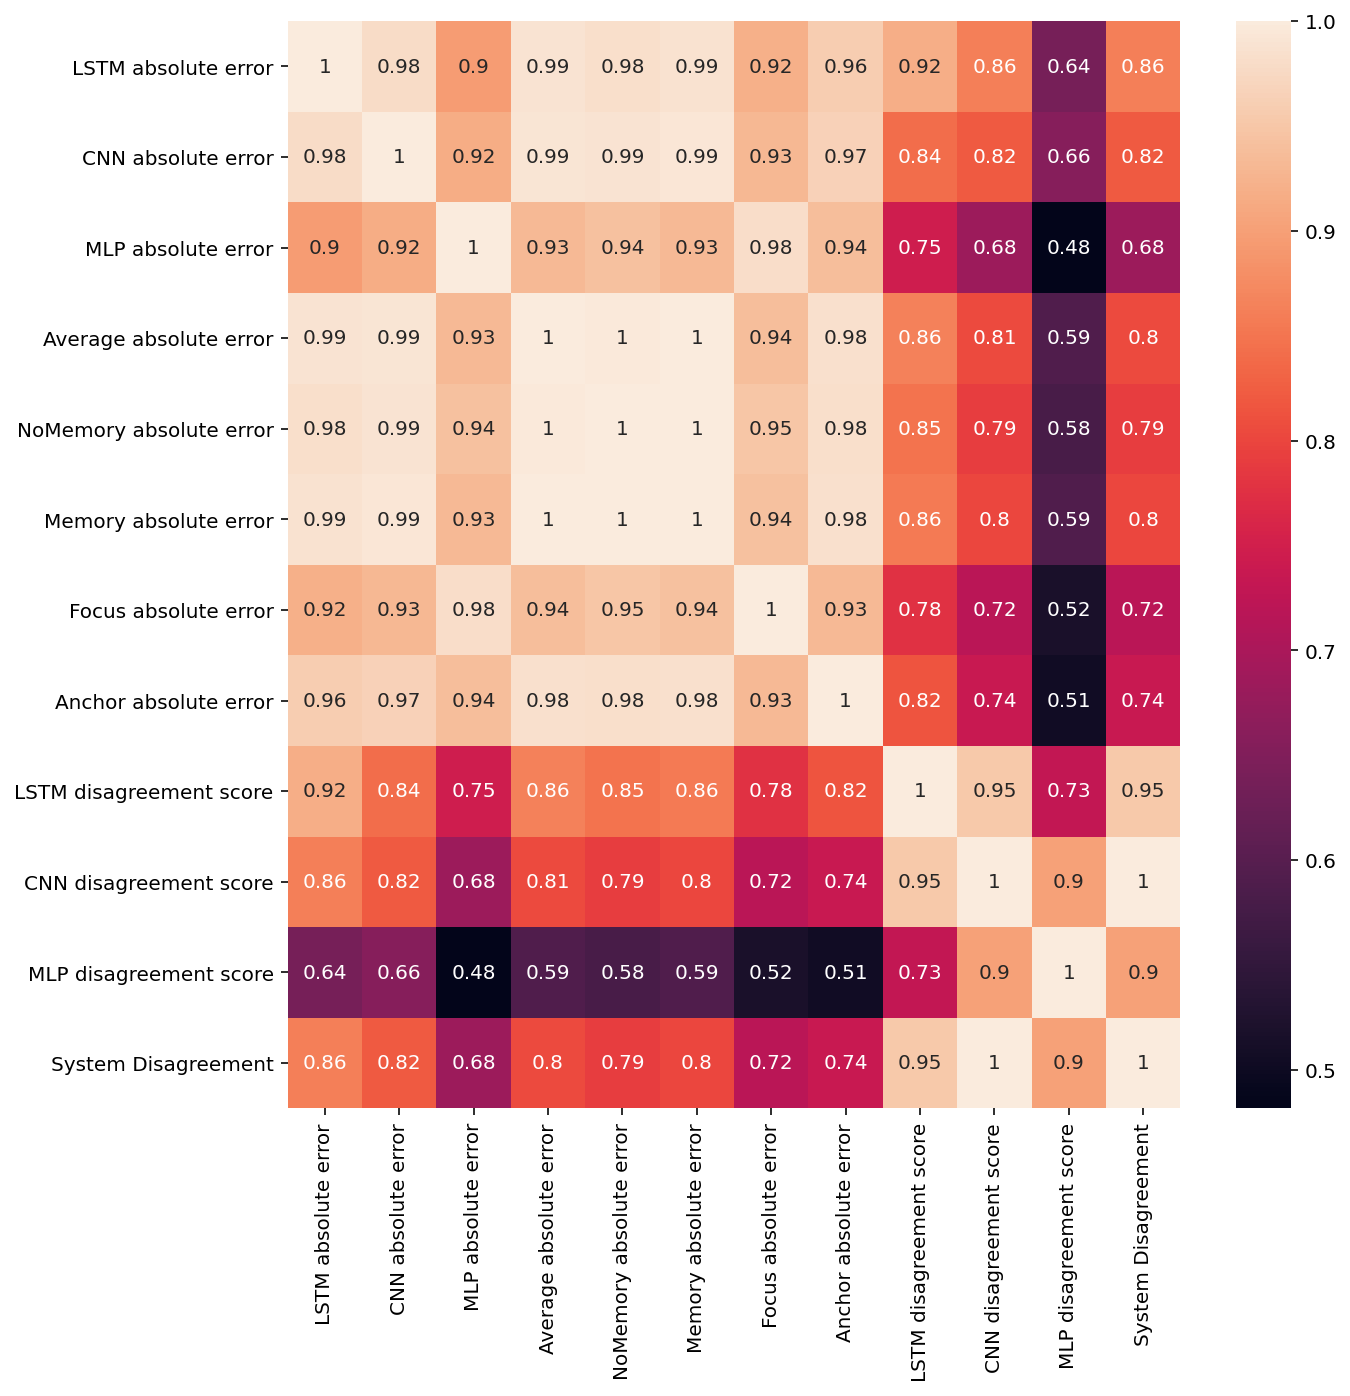

In [144]:
correlation_ = correlation(prediction_error, True)
correlation_

In [20]:
correlation_.to_csv(dir_ + run_id + '_Error_Correlation.csv')

### MAE, MSE and MSE log scores

,Algorithms,MSE
0,Average,5.423138
1,NoMemory,4.904576
2,Memory,5.026635
3,Focus,2.654888
4,Anchor,3.098071
5,LSTM,10.788967
6,CNN,4.920770
7,MLP,2.668088


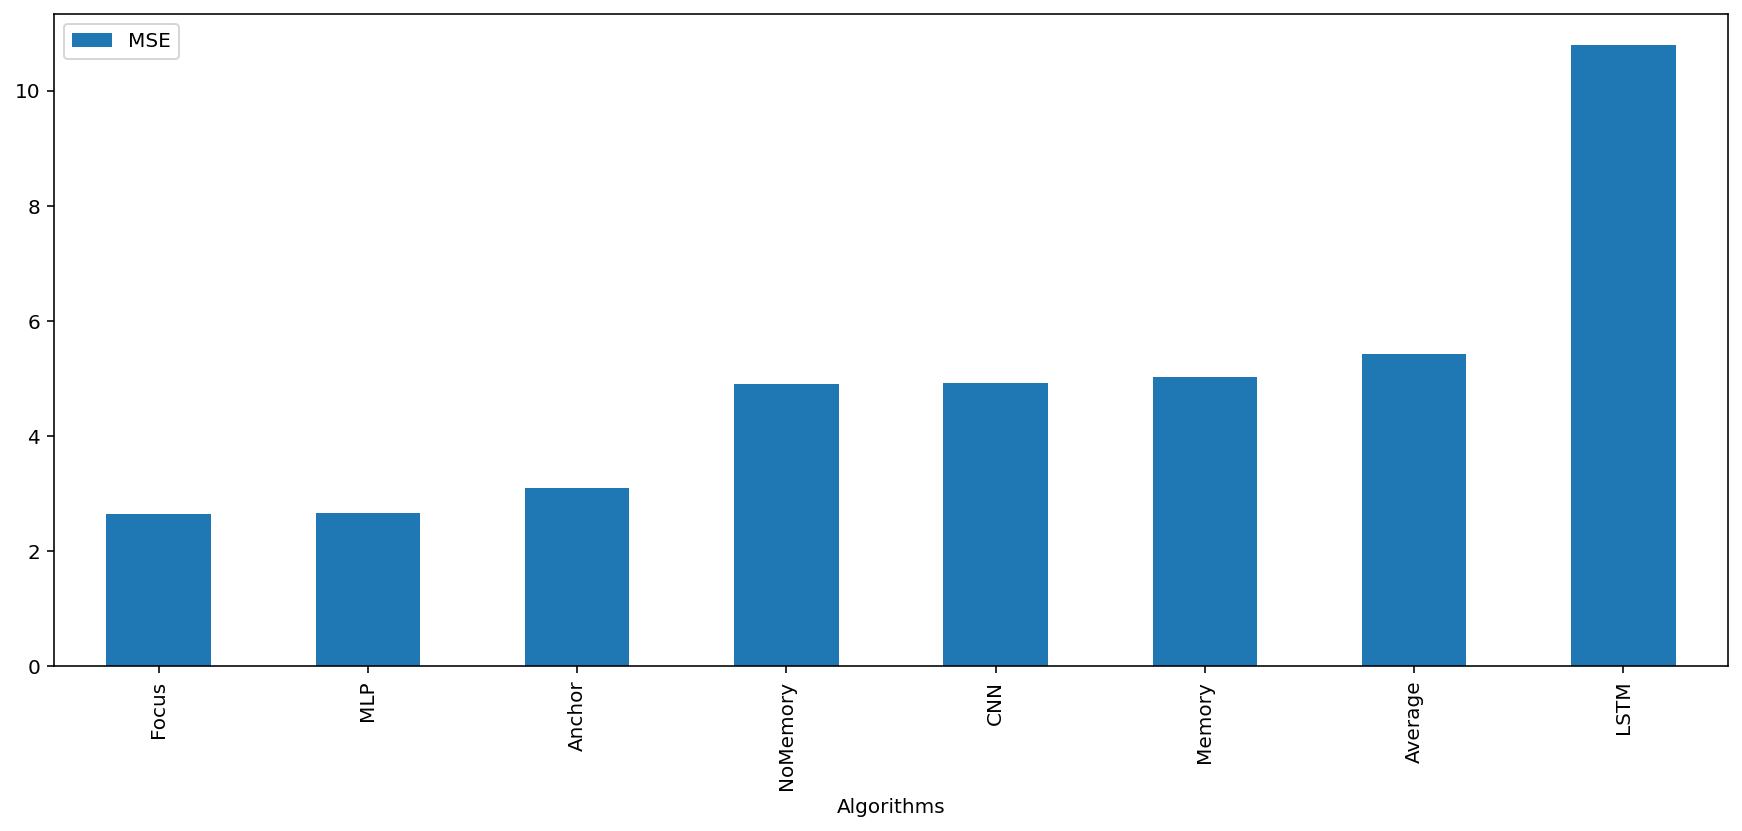

In [145]:
mse = mse_score(all_forecasts, True)
mse

In [22]:
mse.to_csv(dir_ + run_id + '_MSE_score.csv')

,Algorithms,MSE Log
0,Average,0.004873
1,NoMemory,0.004381
2,Memory,0.004496
3,Focus,0.002305
4,Anchor,0.002709
5,LSTM,0.010153
6,CNN,0.004395
7,MLP,0.002314


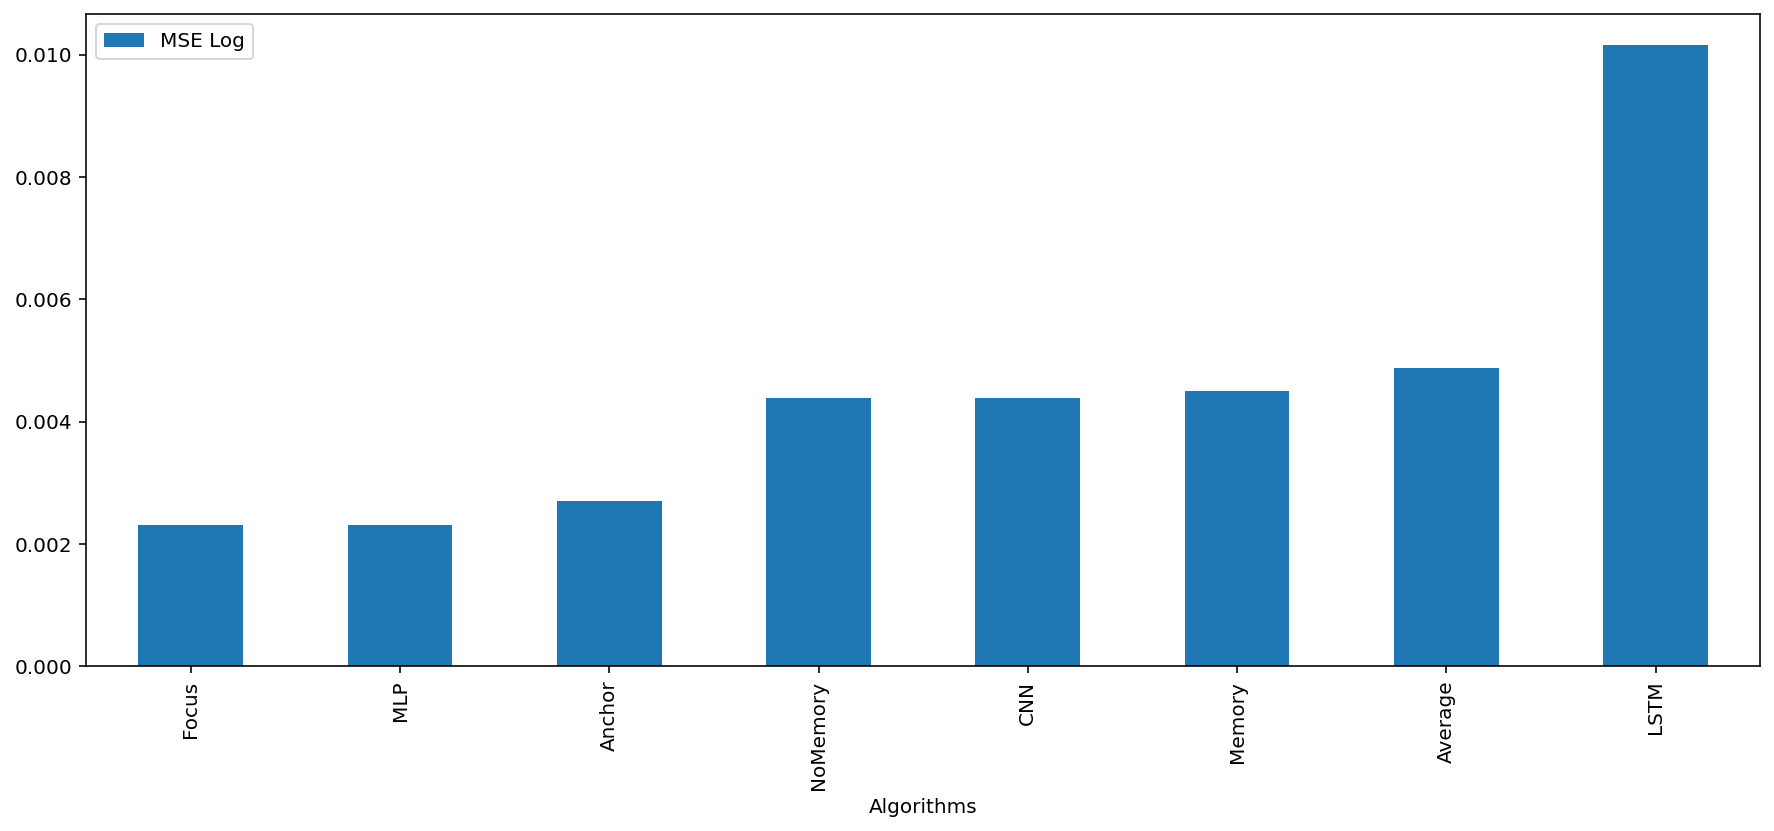

In [146]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [24]:
mse_log.to_csv(dir_ + run_id + '_MSE_log_score.csv')

,Algorithms,MAE
0,Average,1.737555
1,NoMemory,1.616213
2,Memory,1.682842
3,Focus,1.236613
4,Anchor,1.317738
5,LSTM,2.660135
6,CNN,1.705221
7,MLP,1.246561


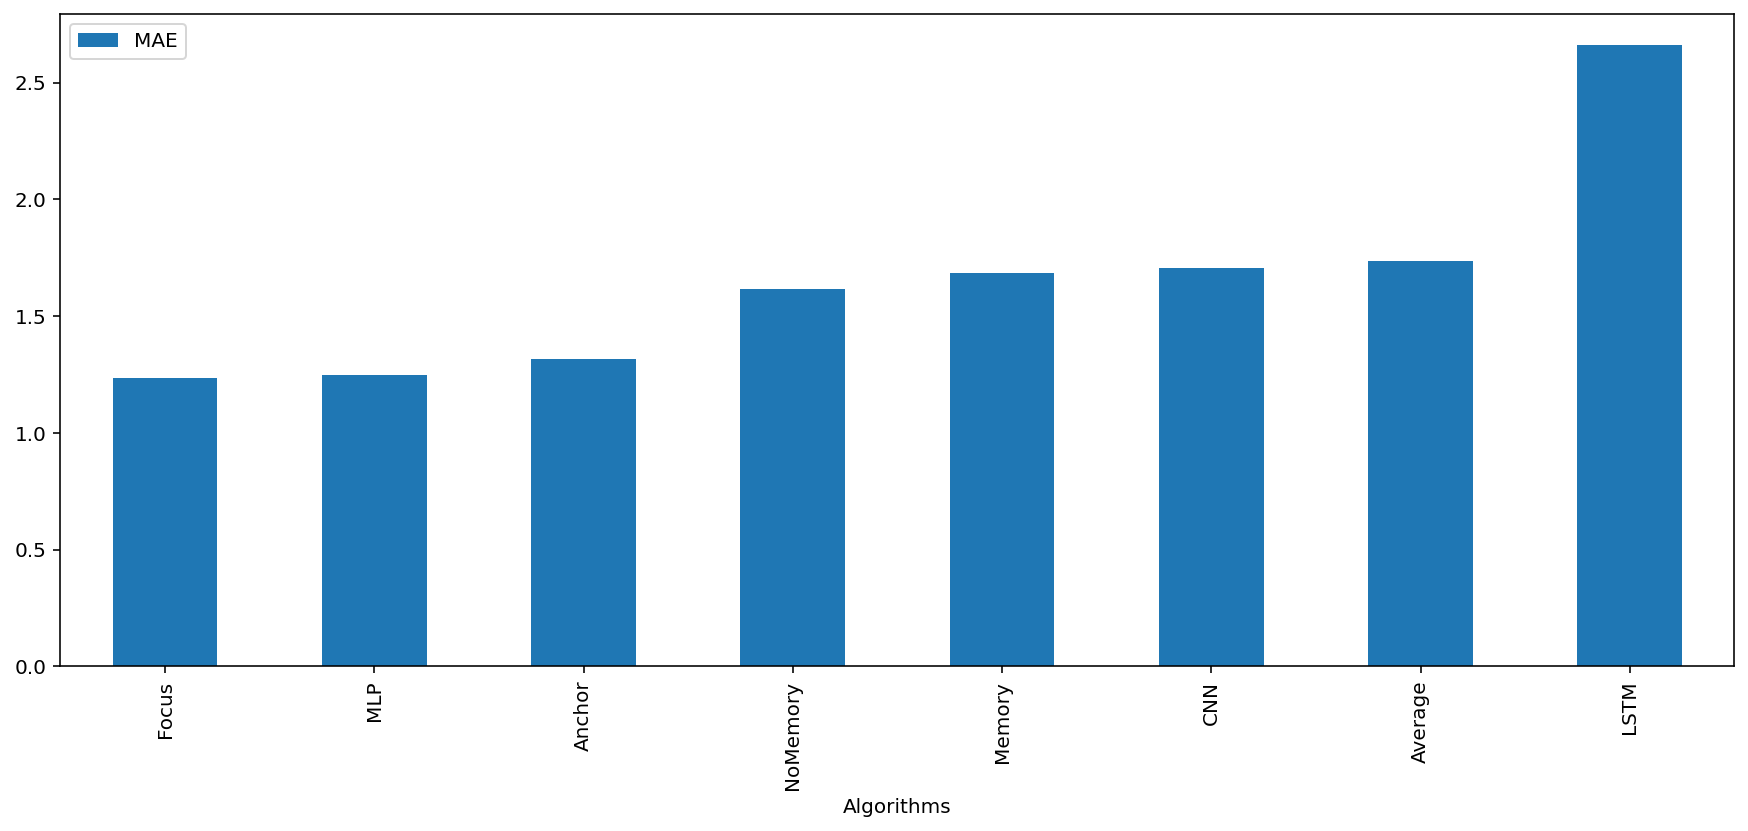

In [147]:
mae = mae_score(all_forecasts, True)
mae

In [26]:
mae.to_csv(dir_ + run_id + '_MAE_score.csv')

### Performance plotting of all forecasting algorithms

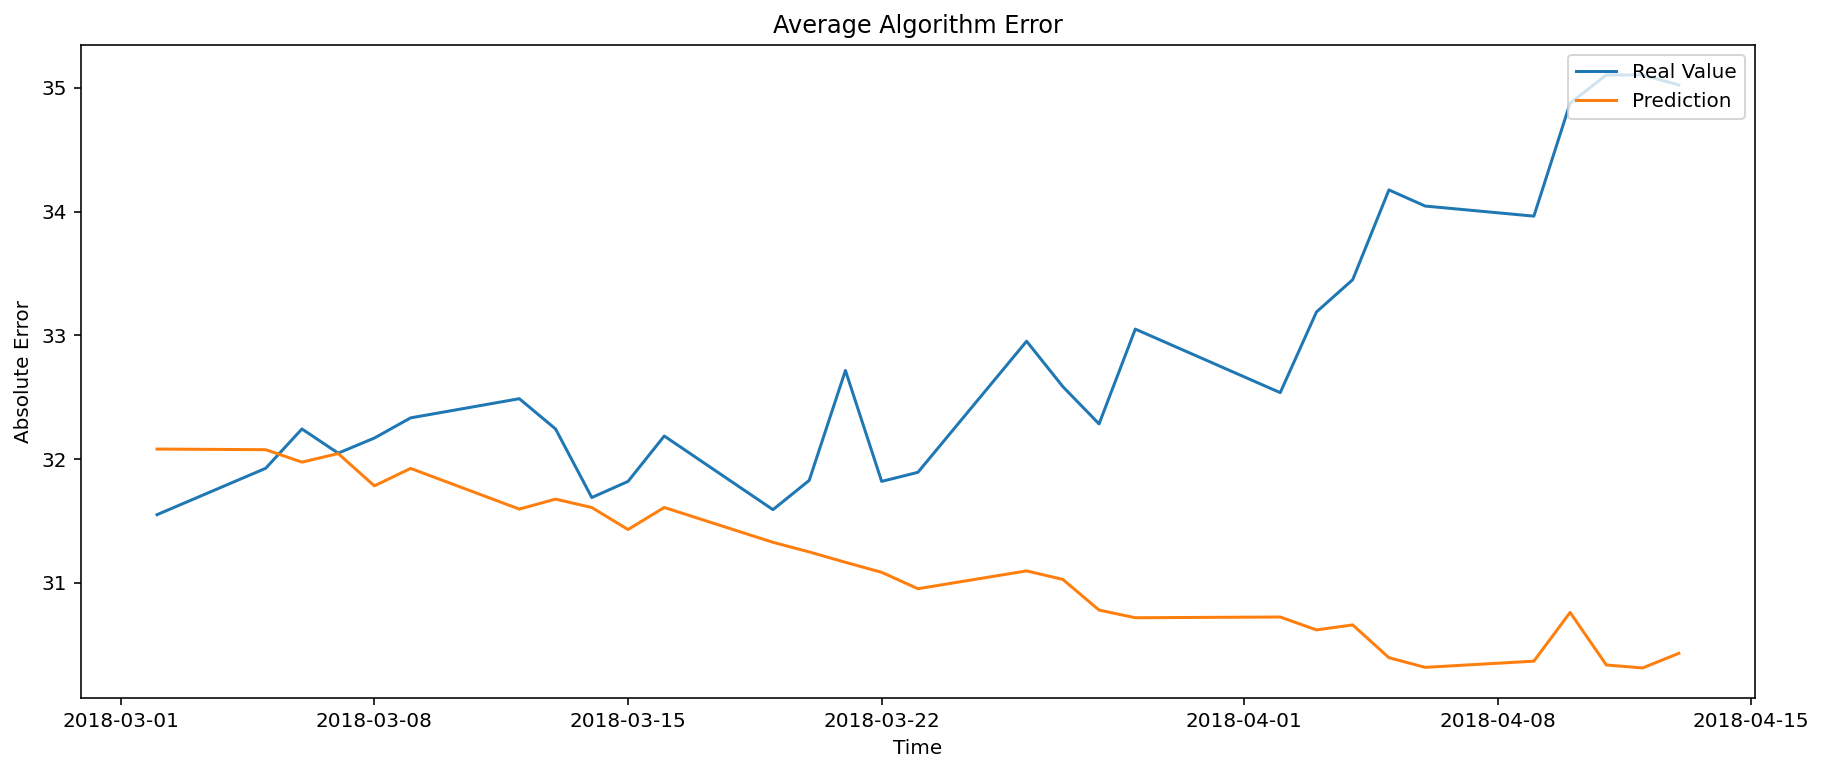

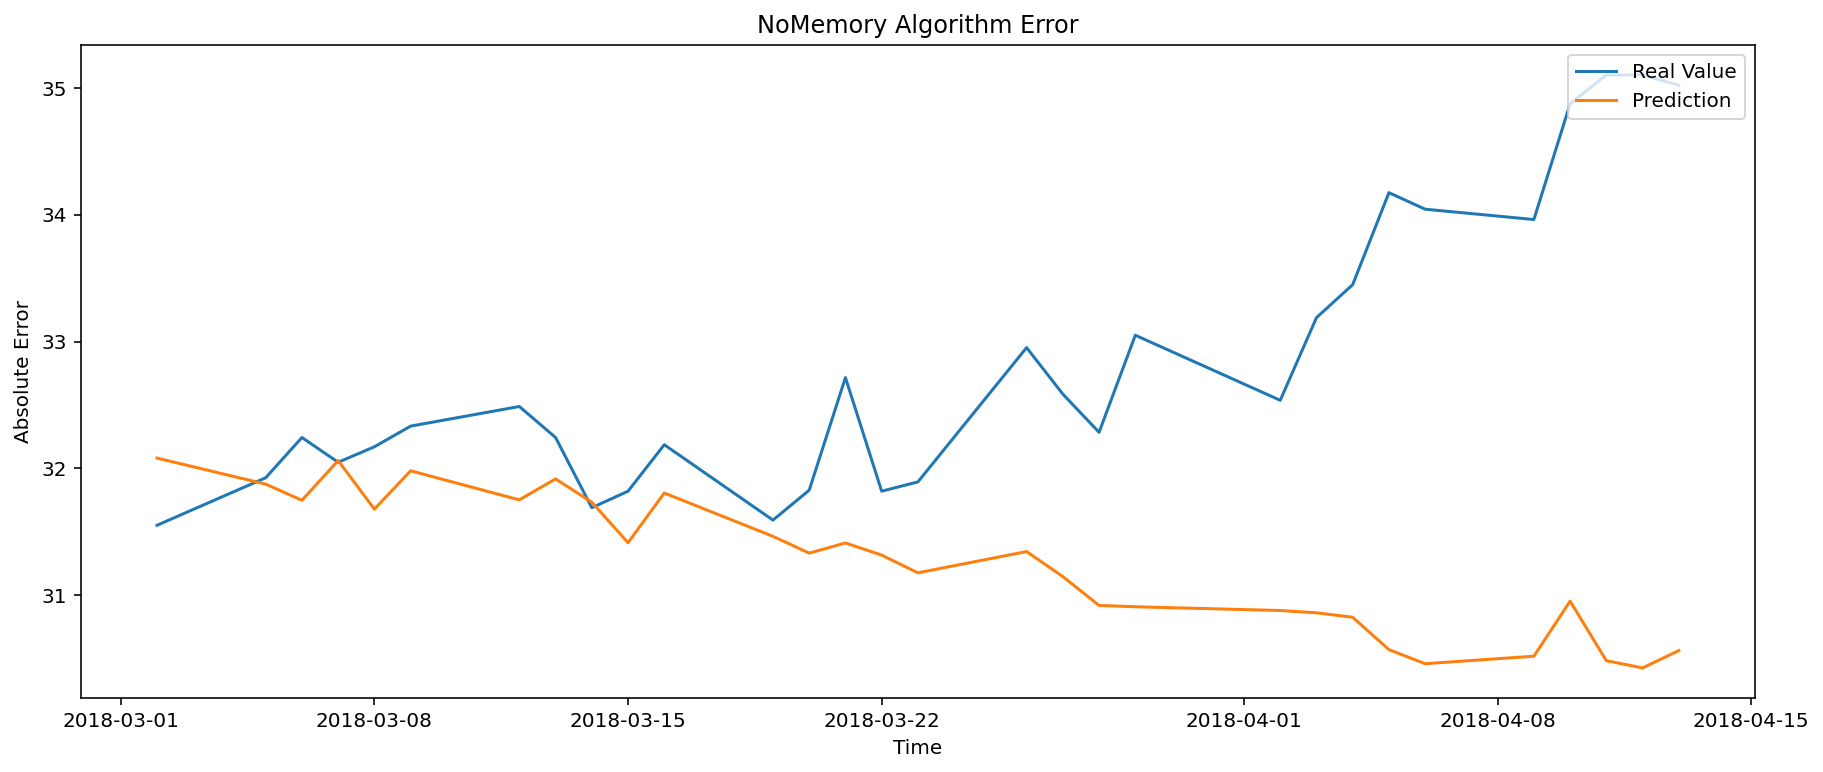

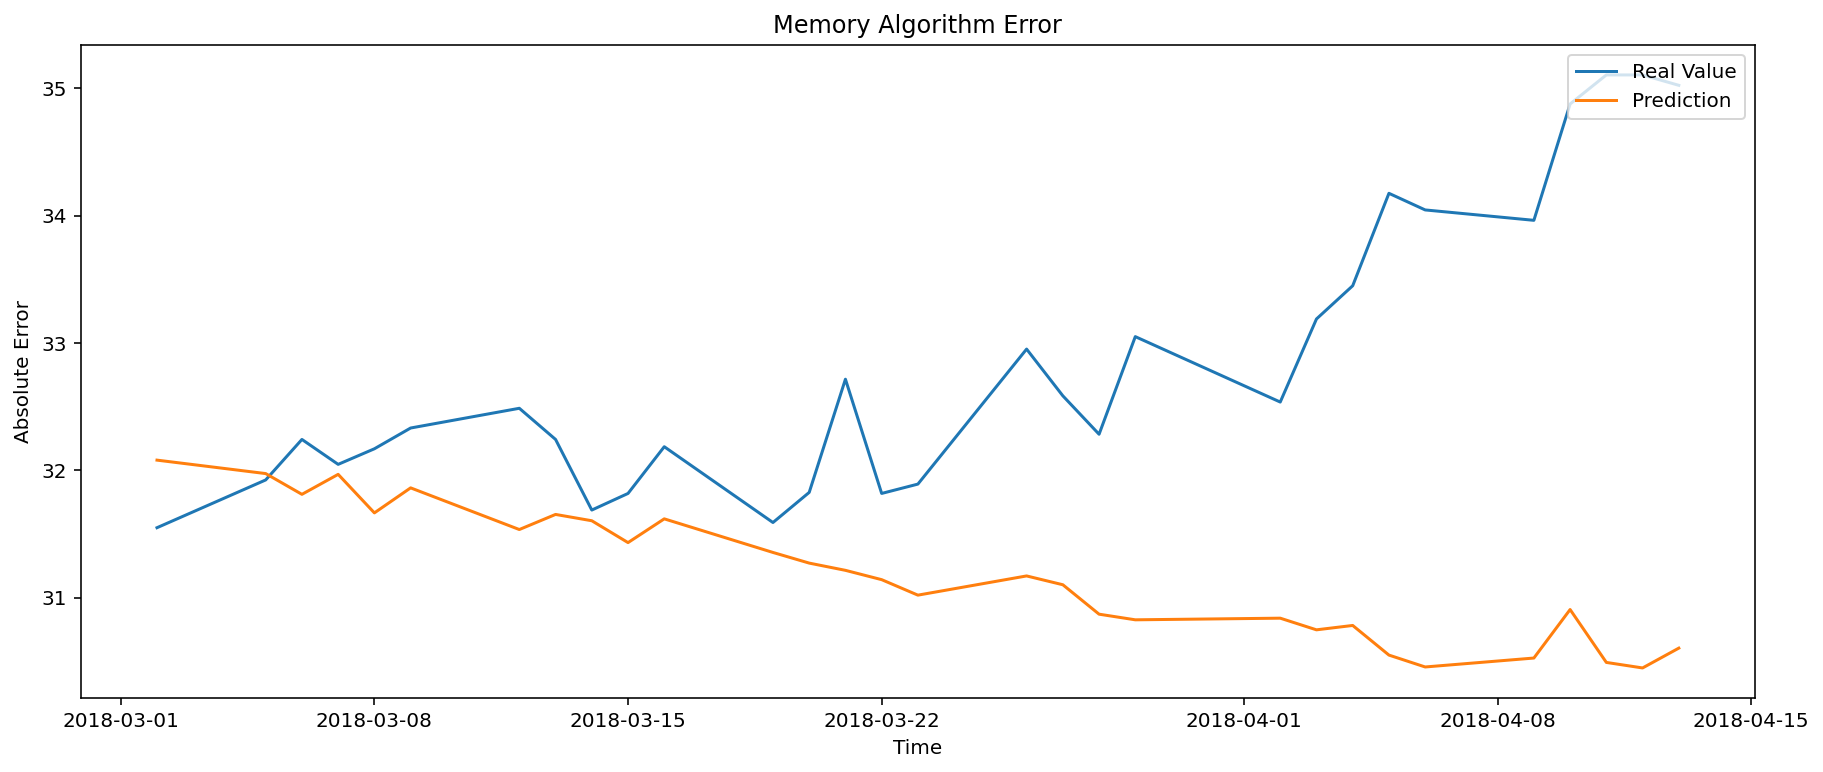

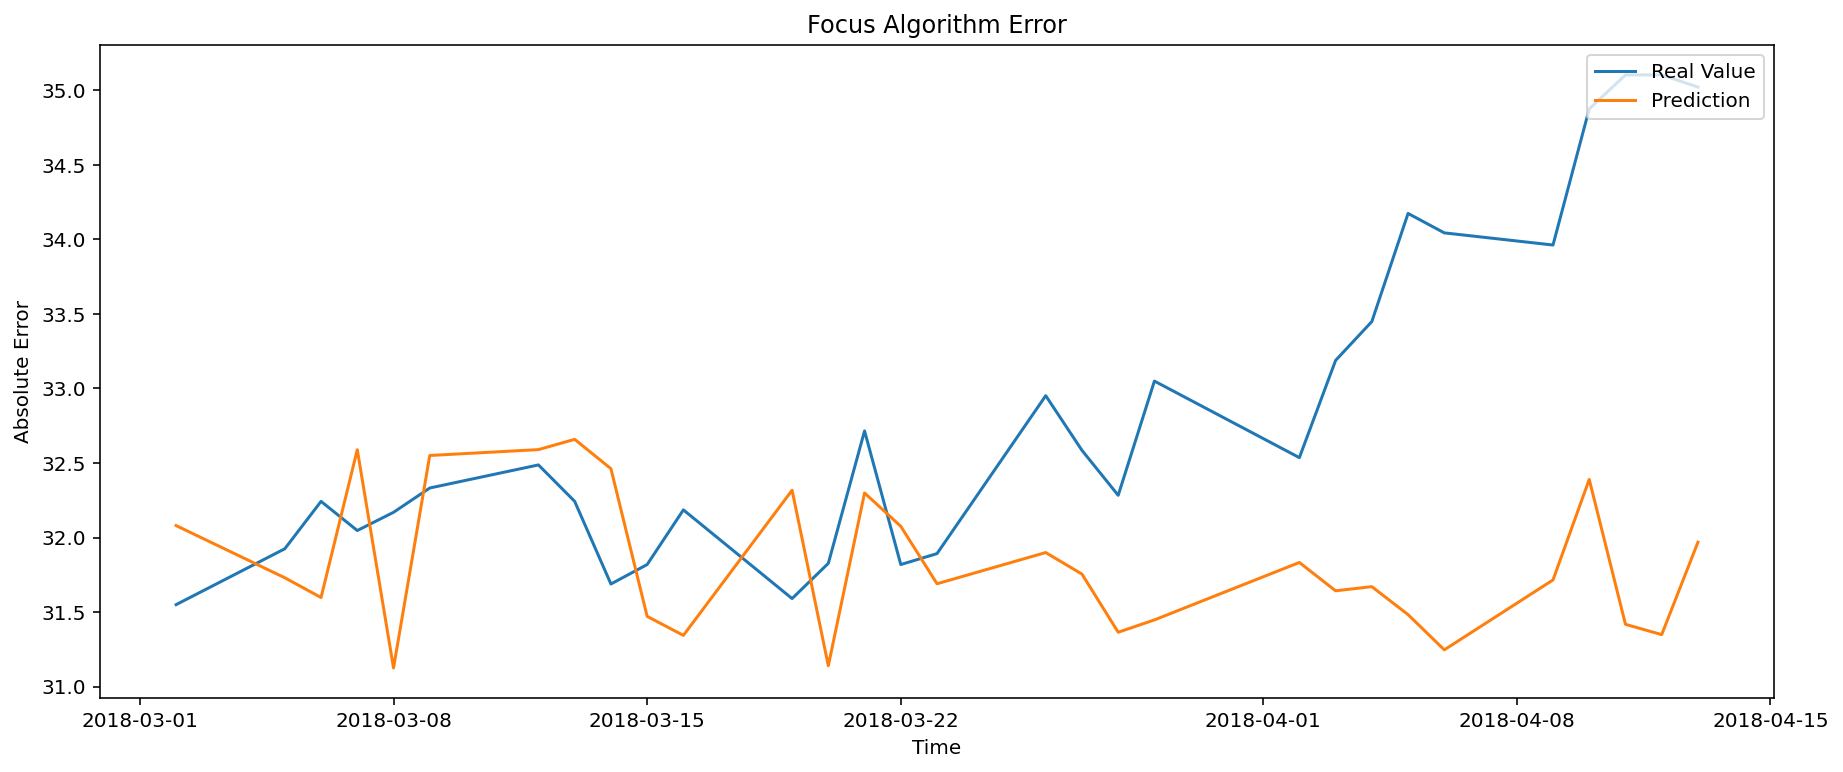

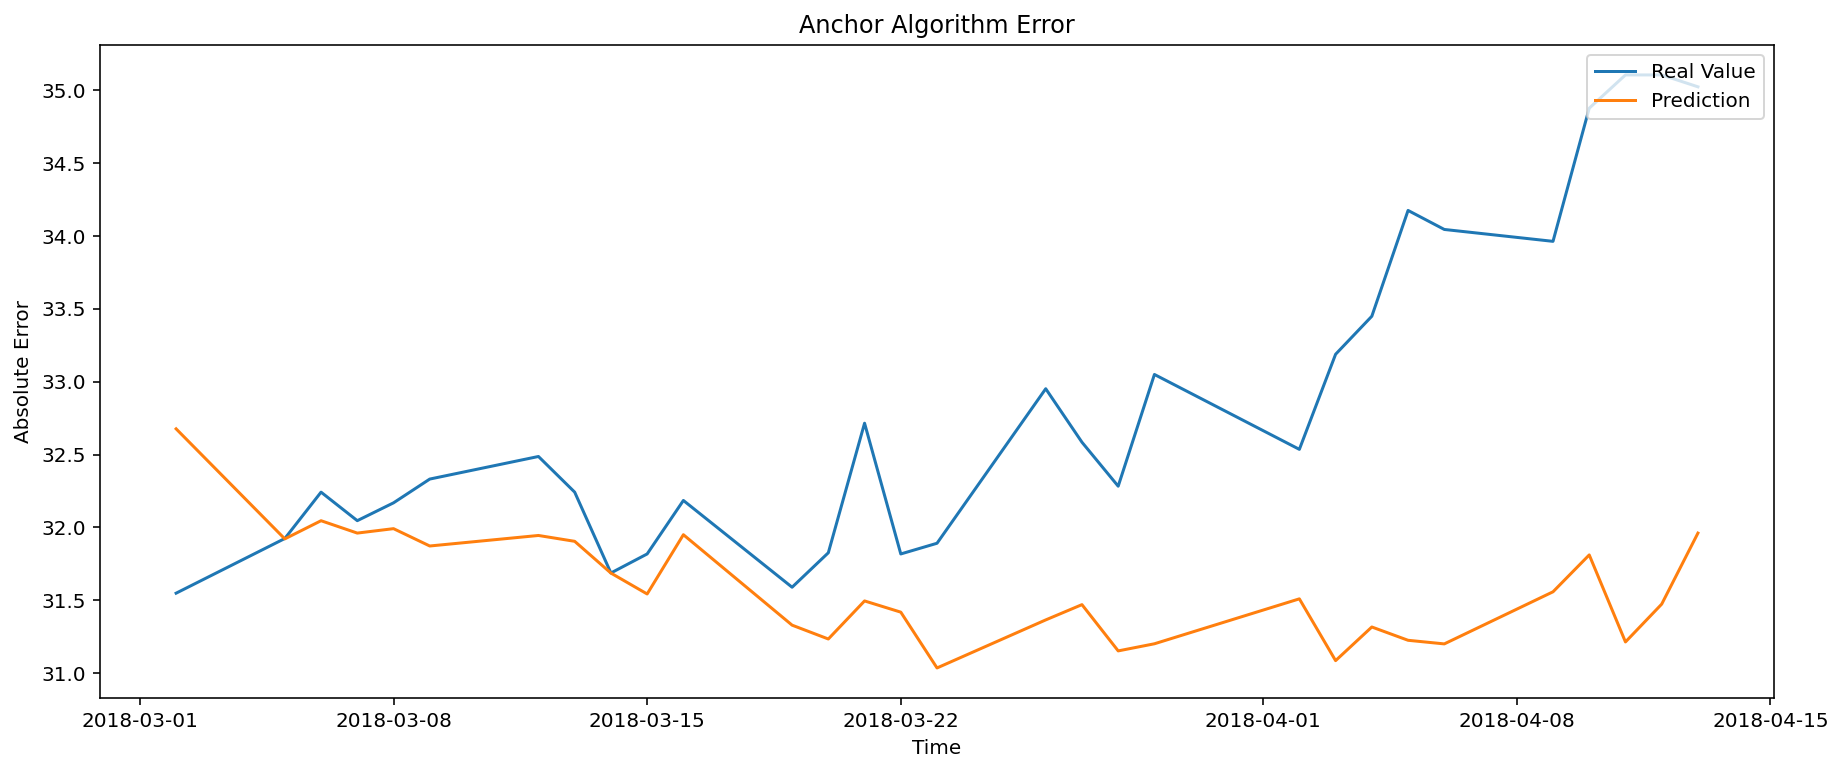

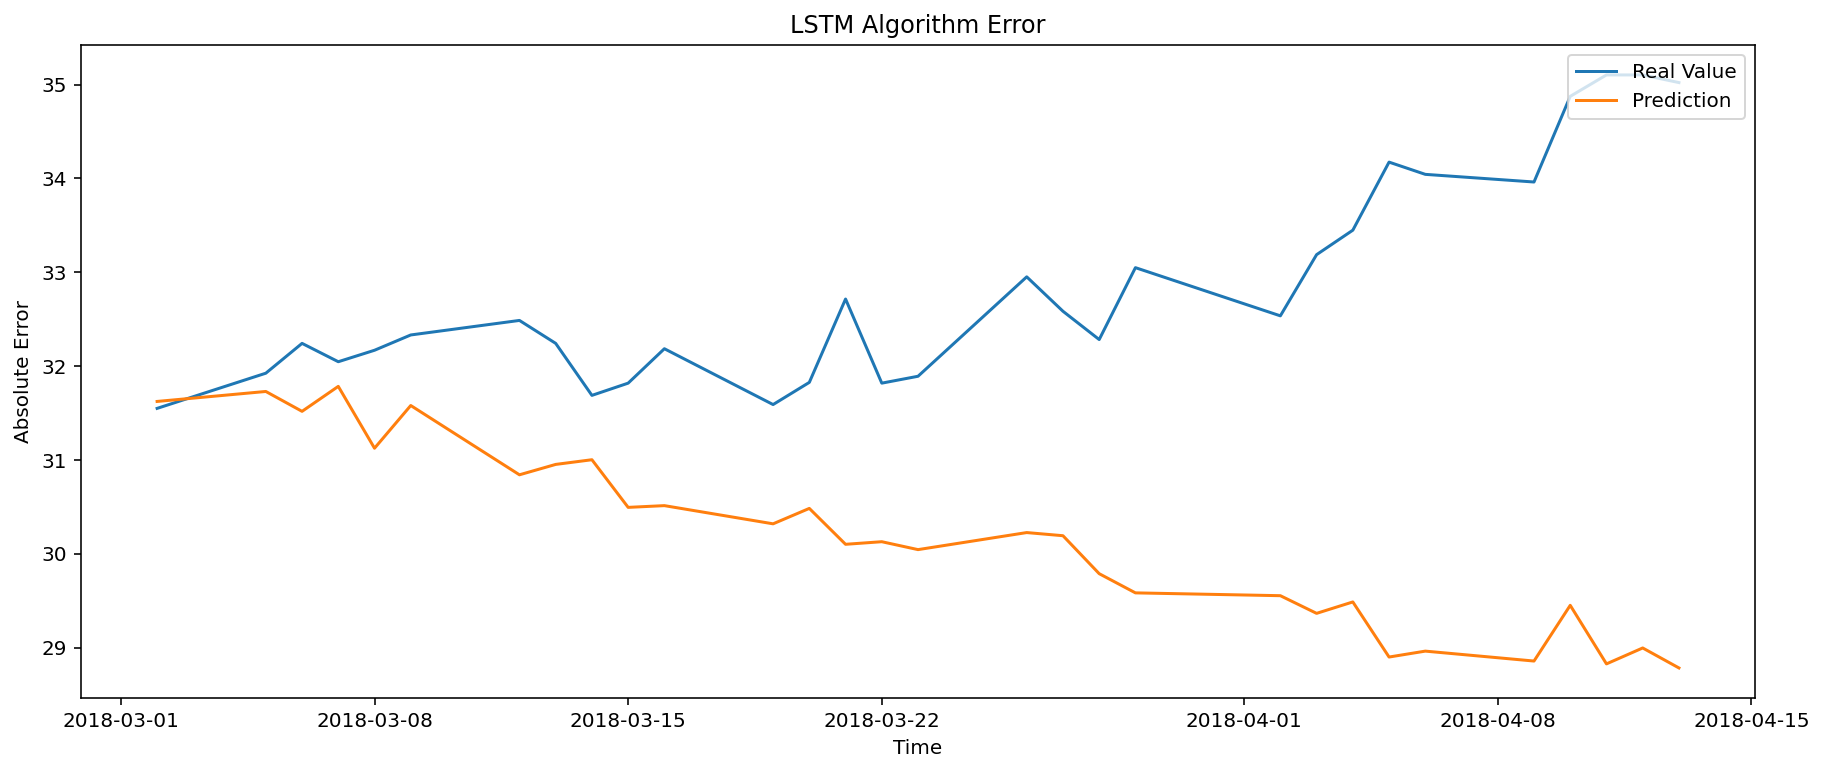

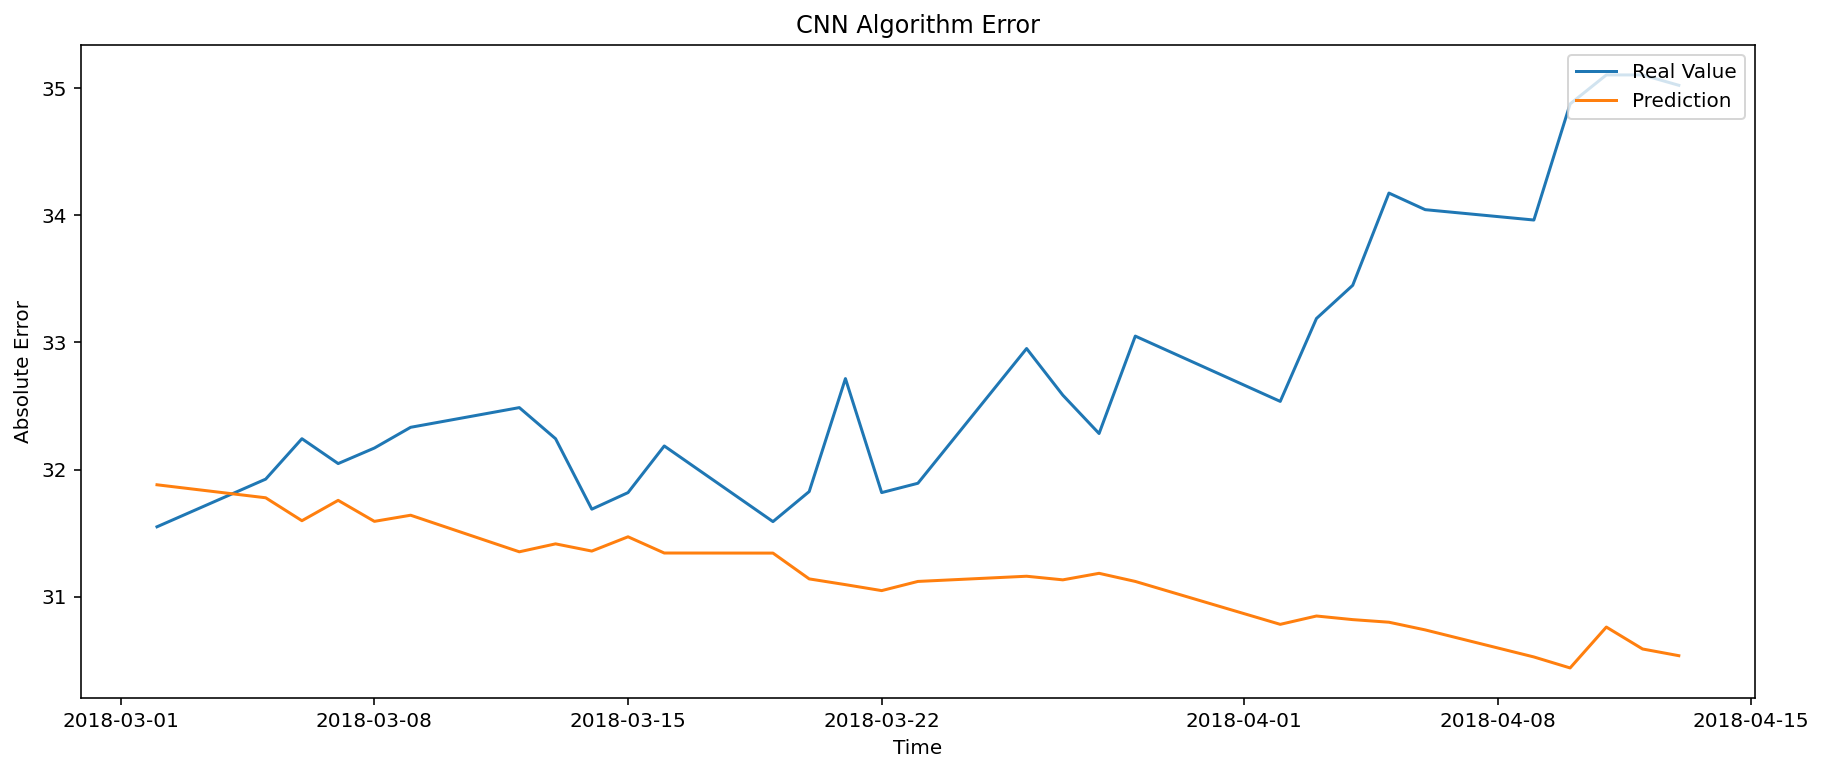

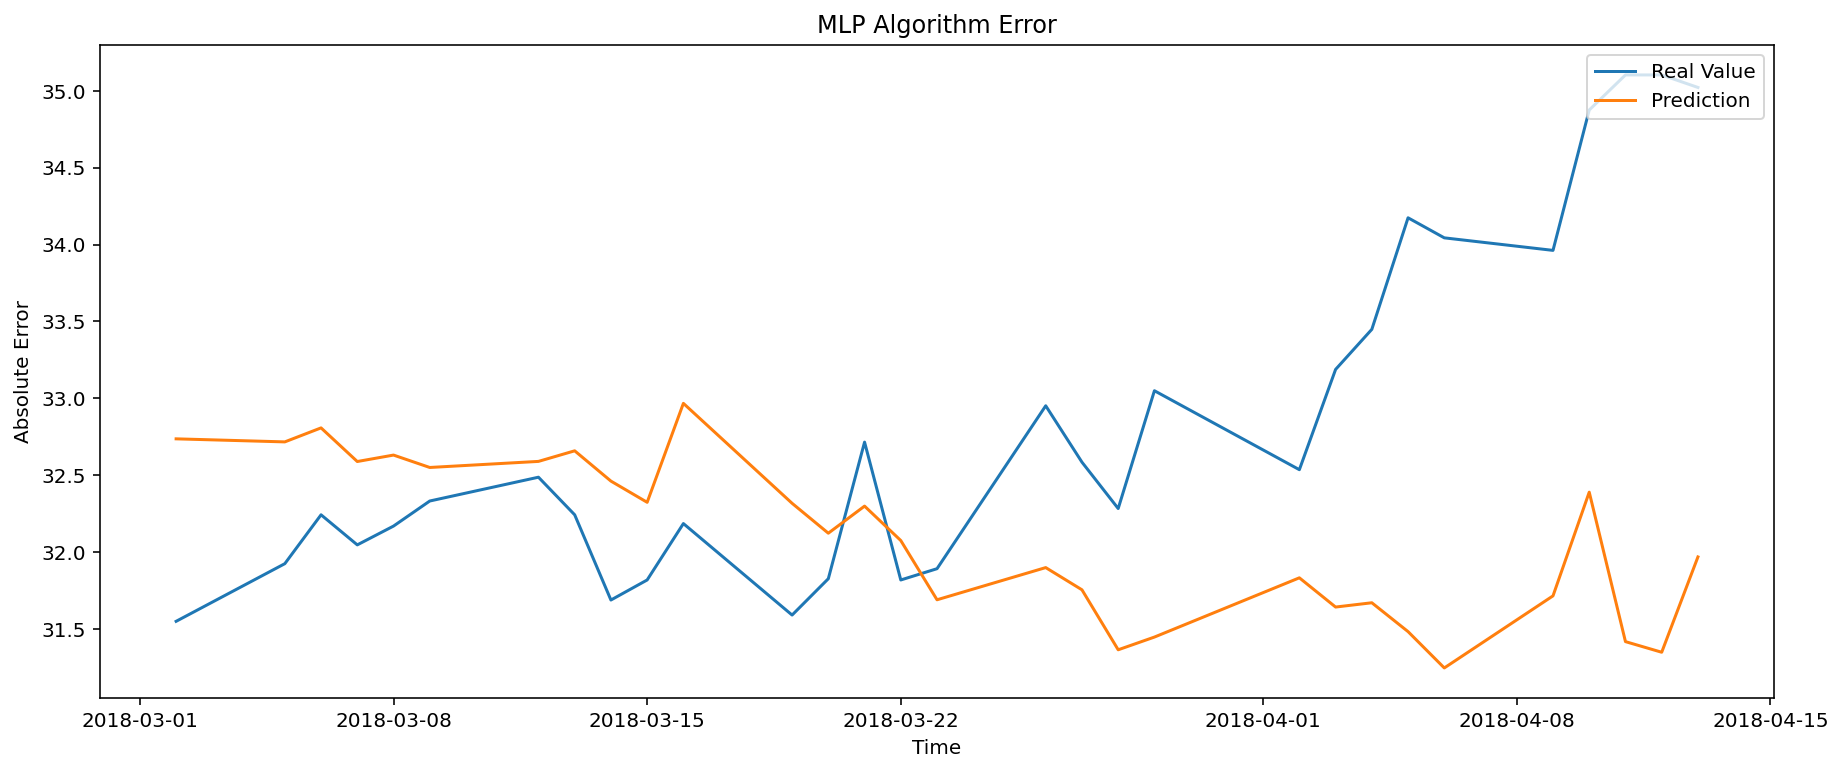

In [148]:
plot_performance(all_forecasts)